In [1]:
import numpy as np 
import cv2    # OpenCV Python Computer Vision Library 
from PIL import Image # Python Image Library
from IPython.display import Image
from matplotlib import pyplot as plt
import os


In [2]:
# Load and save the image using path 
# Need to make the path a raw string because of escape characters etc.

pic_path = r'XX\XXX\XXX\Your_Image.jpg'


In [3]:
image_in = Image(filename=pic_path)
# filename is a class constructor argument in IPython.display Image library

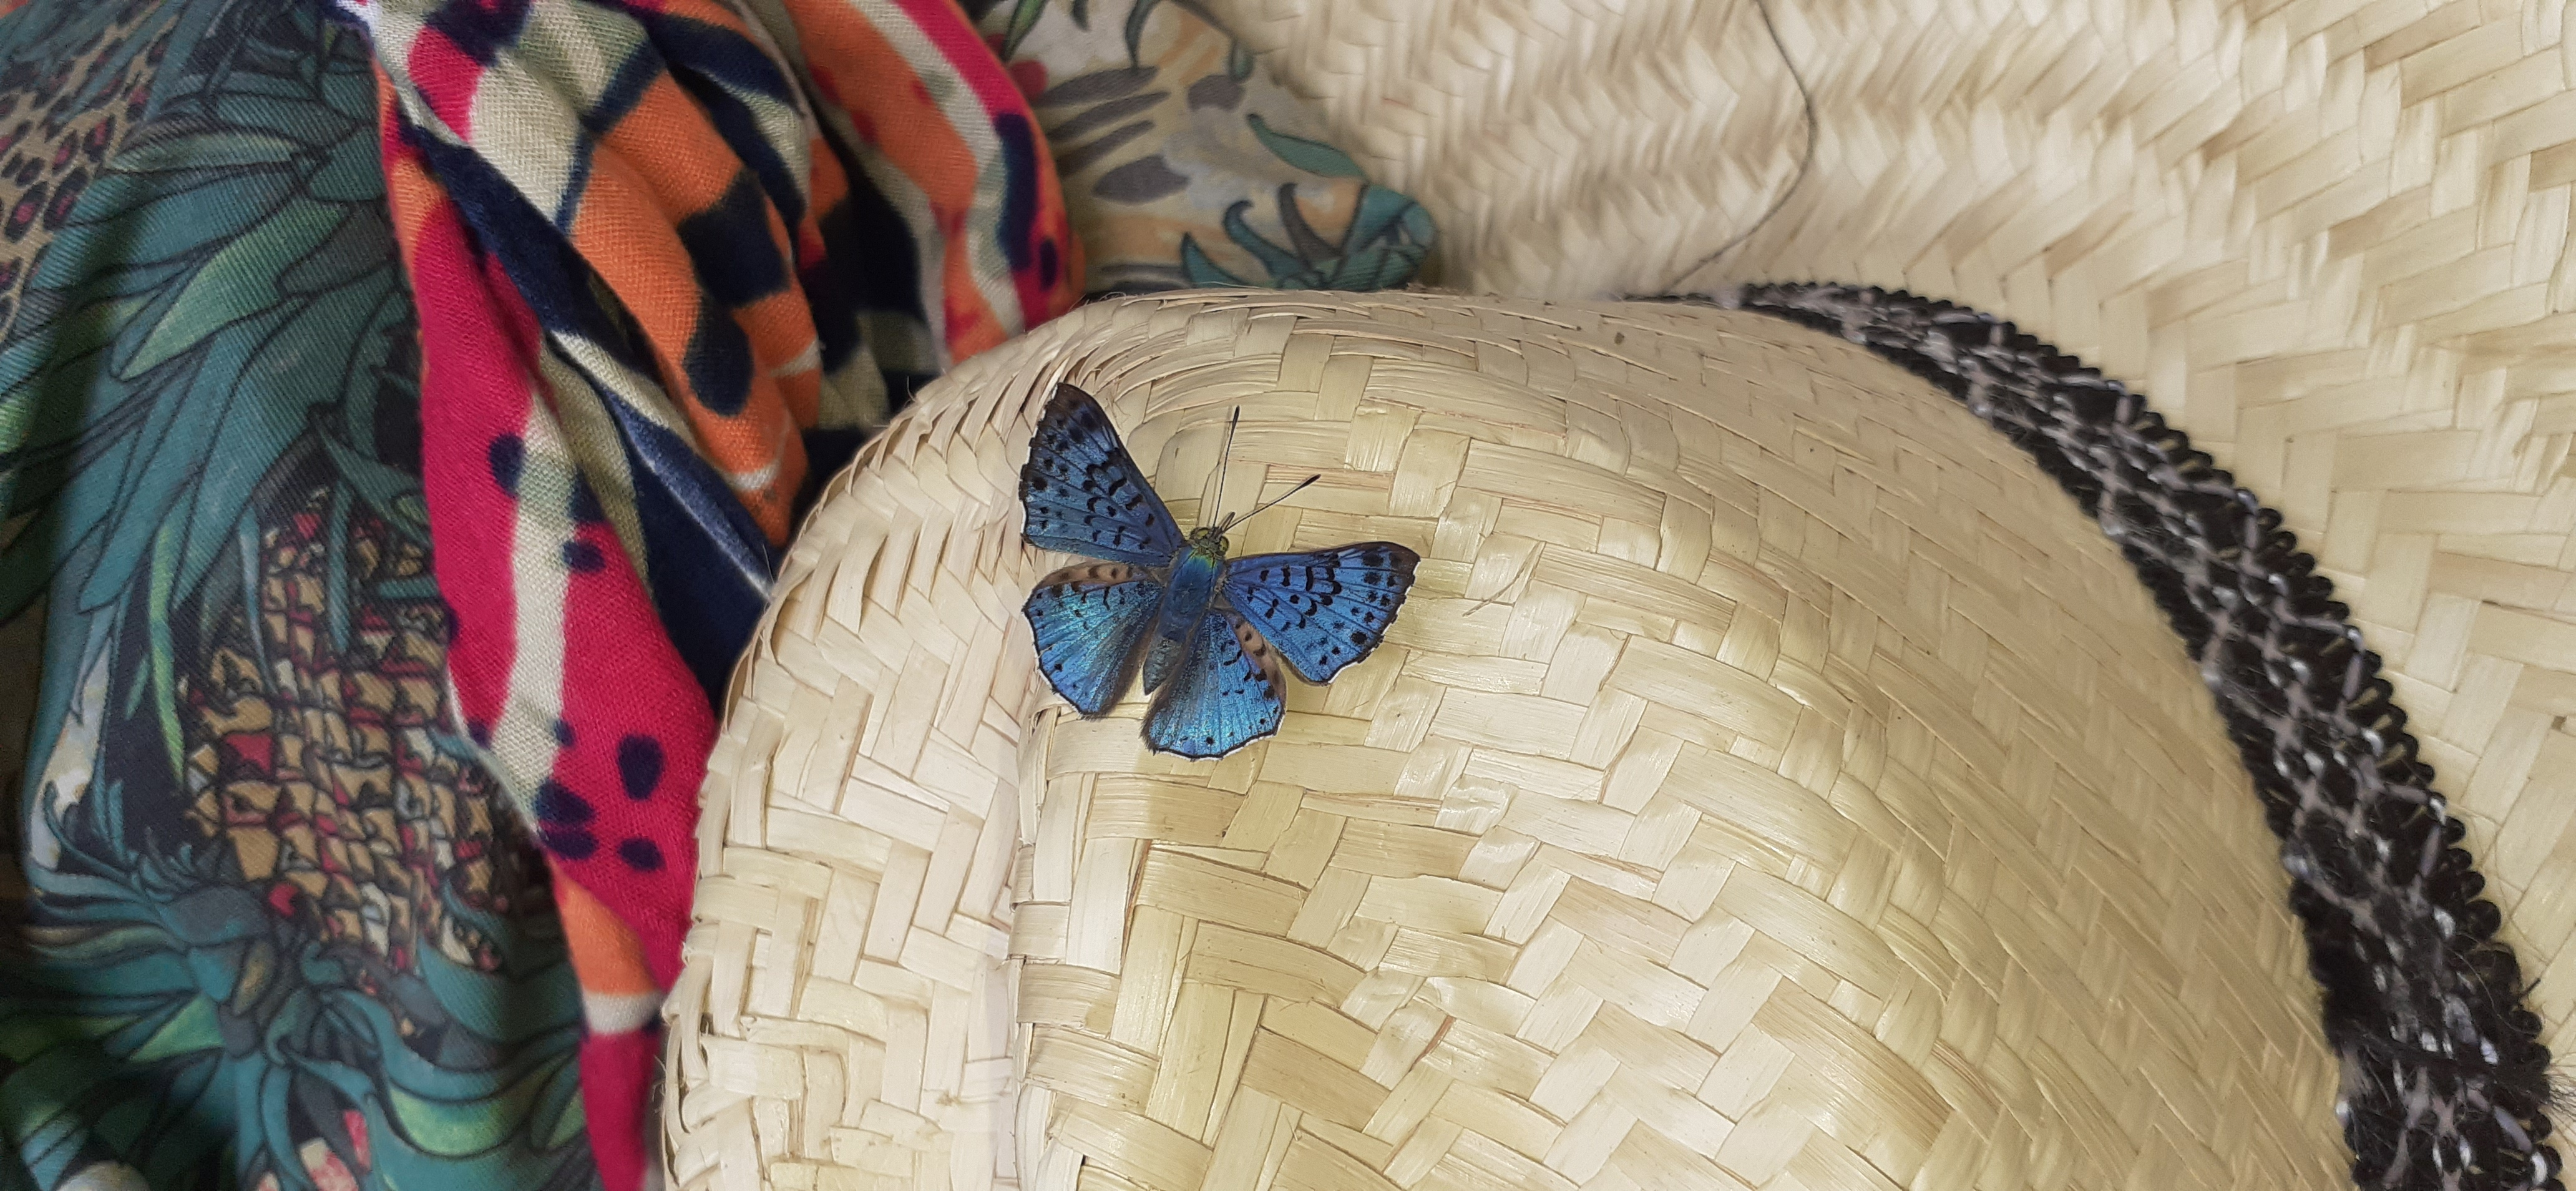

In [198]:
image_in

In [199]:
Original = cv2.imread(pic_path) # This saves the image as a multi-demensional array
                                # Need to use Matplotlib to display the image


In [200]:
#Original
# Prints the array of pixel values
# Values are BGR not RGB
# This is how cv2 stores images

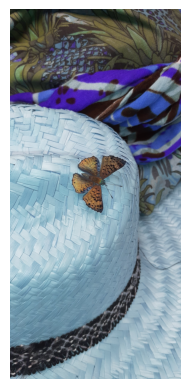

In [201]:
# Display the original image to see if it is saved correctly
# Need to use Matplotlib to display the image
plt.imshow(Original)
plt.axis('off')
plt.show()
# Image is shown with colours distorted
# cv2 reads and stores the image in BGR format, not RGB 
# The resulting image can be pretty cool though

In [202]:
Orig_RGB = cv2.cvtColor(Original, cv2.COLOR_BGR2RGB)
# Converting back to RGB format
print(Orig_RGB.shape)
# Get dimensions of the image using NumPy 'shape' method
# The output for Orig_RGB.shape is a tuple representing 
# the image values. The elements are:
# (Height (in rows), Width (in columns), Colour Channels (RGB))

(4128, 1908, 3)


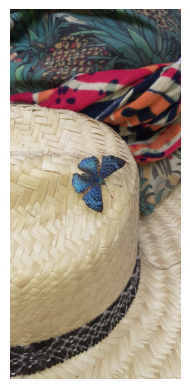

In [203]:
plt.imshow(Orig_RGB)
plt.axis('off')
plt.show()

In [204]:
def resize(image, new_width, new_height):
    """
    Function to resize the image, using Cubic Interpolataion.
    This is more costly, than Linear Interpolation for example,
    but should give better image when sizing up.
    new_width and new_height will be millimeters
    """
    return cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    

In [205]:
def segmenting(image, segment_width, segment_height):
    """
    Function to segment the resized image into A4 size segments.
    Idea is to iterate over the rows and columns of the image and
    box off each A4 sized segment. Will then store these segments
    in a list. 
    segment_width and segment_height will be calculated in pixels    
    """
    segments = [] # List to store the A4 size sections
    width, height, _ = image.shape   # Original image dimensions
                                     # image.shape returns a tuple
                                     # the _ ignores the 3rd element
    segment_width = max(1, segment_width)   # This is trying to fix an issue
    segment_height = max(1, segment_height) # Ensuring no 0 value width or height
    
    for y in range(0, height, segment_height):
       for x in range(0, width, segment_width):
           # Define segment boundry so will not overshoot poster dimensions
           # Just crop if it is overshooting a bit
           seg_x_end = min(x + segment_width, width)
           seg_y_end = min(y + segment_height, height)
           # Pad the edge with blank space if the segment is landing short
           # of the poster edge. To prevent segment size mismatches.
           # Create a blank segment of the correct size
           seg_padded = np.zeros((segment_height, segment_width, 3), dtype = np.uint8)
           # tuple of height, width, channels. dtype uint8 for pixels: 0 - 255
           segment = image[y : seg_y_end, x : seg_x_end]
           # vertical (y : seg_y_end) and horizontal (x : seg_x_end) 
           # ranges for iteration
           print(f'segment shape: {segment.shape}')
           seg_padded[:segment.shape[0], :segment.shape[1]] = segment 
           # This will copy all the elements of the segment into the blank segment
           # If the segment is smaller, the remaining positions will just be left blank
           # Will result in the segment being the correct size
           print(f'seg_padded shape: {seg_padded.shape}')
           segments.append(seg_padded)
    return segments
            
            
            
    
    
    
    

image


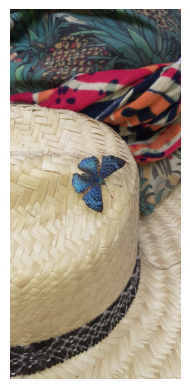

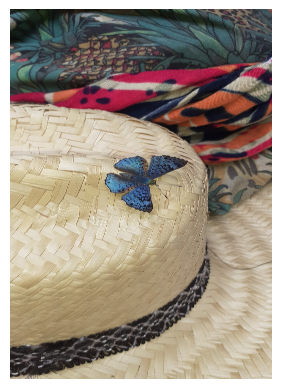

Poster shape: (17539, 12401, 3)
segment shape: (3507, 2480, 3)
seg_padded shape: (3507, 2480, 3)
segment shape: (3507, 2480, 3)
seg_padded shape: (3507, 2480, 3)
segment shape: (3507, 2480, 3)
seg_padded shape: (3507, 2480, 3)
segment shape: (3507, 2480, 3)
seg_padded shape: (3507, 2480, 3)
segment shape: (3507, 2480, 3)
seg_padded shape: (3507, 2480, 3)
segment shape: (3507, 1, 3)
seg_padded shape: (3507, 2480, 3)
segment shape: (3507, 0, 3)
seg_padded shape: (3507, 2480, 3)
segment shape: (3507, 0, 3)
seg_padded shape: (3507, 2480, 3)
segment shape: (3507, 2480, 3)
seg_padded shape: (3507, 2480, 3)
segment shape: (3507, 2480, 3)
seg_padded shape: (3507, 2480, 3)
segment shape: (3507, 2480, 3)
seg_padded shape: (3507, 2480, 3)
segment shape: (3507, 2480, 3)
seg_padded shape: (3507, 2480, 3)
segment shape: (3507, 2480, 3)
seg_padded shape: (3507, 2480, 3)
segment shape: (3507, 1, 3)
seg_padded shape: (3507, 2480, 3)
segment shape: (3507, 0, 3)
seg_padded shape: (3507, 2480, 3)
segment 

In [206]:
def main(Image_in, new_width, new_height, dpi_orig, dpi_new, save_path):
    """
    Image_in as path, new_width and new_height of poster in milimeters
    dpi_orig and dpi_new: dots per inch of original and for the resized poster
    save_path where the poster will be saved as a file of A4 size sections
    """

    pic_path = r'XXX\XXX\Your_Folder\Your_Image.jpg' # Local path to image
    # new_width = 1000    # Poster Width
    # new_height = 1500   # Poster Height

    
    Image_in = cv2.imread(pic_path)
    if Image_in is None:
        print('Error Loading Image')
    Image_RGB = cv2.cvtColor(Image_in, cv2.COLOR_BGR2RGB)
    print('image')
    plt.imshow(Image_RGB)
    plt.axis('off')
    plt.show()
    

    # Convert width and height from milimeters to pixels
    # Convert to inches for new dpi value
    new_width_pix = int(new_width/25.4 * dpi_new)
    new_height_pix = int(new_height/25.4 * dpi_new)

    # A4 segment size in pixels
    # A4 size is 210mm × 297mm 
    A4_width_pix = int((210/25.4) * dpi_new)
    A4_height_pix = int((297/25.4) * dpi_new)

    # The increase in dpi will need to be calculated as a scaling factor
    scale_factor = dpi_new / dpi_orig
    
    # Scale up the image.
    Poster = cv2.resize(Image_RGB, (new_width_pix, new_height_pix),
                        fx=scale_factor, fy=scale_factor, interpolation= cv2.INTER_CUBIC)
    plt.imshow(Poster)
    plt.axis('off')
    plt.show()
    print(f'Poster shape: {Poster.shape}')
    # Segment Poster
    segments = segmenting(Poster, A4_width_pix, A4_height_pix)

    # Save segments
    # Loop over the segments list and save to destination
    # Also need to convert back to RGB from BGR 
    for i, seg in enumerate(segments):
        seg_RGB = cv2.cvtColor(seg, cv2.COLOR_BGR2RGB)
        saving = os.path.join(save_path, f'Section_{i+1}.png')
        success = cv2.imwrite(saving, seg_RGB)
        if not success:
            print(f'Error saving sement {i+1}')
        # try:
        #     cv2.imwrite(save_path + f'Section_{i+1}.png', seg)
        # except Exception as e:
        #     print(f'Error writing segment {i+1}: {e}')
        
if __name__ == "__main__":
    #main(Image_in, new_width, new_height, dpi_orig, dpi,new, save_path)
    pic_path = r'XXX\XXXX\Your_Folder\Your_Image' # Local path to image
    dpi_orig = 72  # This is fixed at what the original image is
    dpi_new = 300  # This can be adjusted 
    save_path = r'XXX\XXX\Your_Folder\Poster_Segments'
    new_width = 1000    # Poster Width
    new_height = 1500   # Poster Height
    main(pic_path, new_width, new_height, dpi_orig, dpi_new, save_path)
  